# Determine JetLitter Augmentation values

In [6]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision.transforms as T

In [7]:
plt.rcParams["savefig.bbox"] = 'tight'
orig_img = Image.open("Path/To/Sample/Image/")
# if you change the seed, make sure that the randomly-applied transforms
# properly show that the image can be both transformed and *not* transformed!
torch.manual_seed(0)


def plot(imgs, with_orig=True, row_title=None, **imshow_kwargs):
    if not isinstance(imgs[0], list):
        # Make a 2d grid even if there's just 1 row
        imgs = [imgs]

    num_rows = len(imgs)
    num_cols = len(imgs[0]) + with_orig
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, squeeze=False)
    for row_idx, row in enumerate(imgs):
        row = [orig_img] + row if with_orig else row
        for col_idx, img in enumerate(row):
            ax = axs[row_idx, col_idx]
            ax.imshow(np.asarray(img), **imshow_kwargs)
            ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

    if with_orig:
        axs[0, 0].set(title='Original image')
        axs[0, 0].title.set_size(8)
    if row_title is not None:
        for row_idx in range(num_rows):
            axs[row_idx, 0].set(ylabel=row_title[row_idx])

    plt.tight_layout()
    plt.show()

Brightness


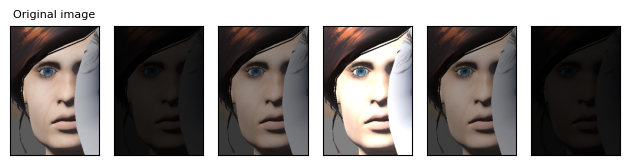

In [59]:
print('Brightness') # best: 0.0 - 1.7
num = 1.7
jitter = T.ColorJitter(brightness=[0,num])
jitted_imgs = [jitter(orig_img) for _ in range(5)]
plot(jitted_imgs)

Contrast


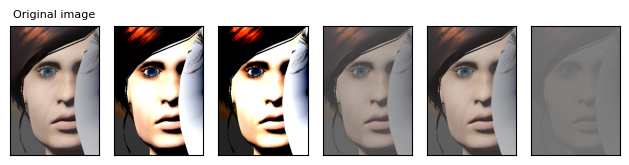

In [67]:
print('Contrast')  # best: 0.0 - 3.0
num = 3
jitter = T.ColorJitter(contrast=[0, num])
jitted_imgs = [jitter(orig_img) for _ in range(5)]
plot(jitted_imgs)

Saturation


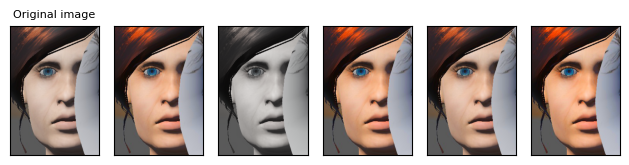

In [77]:
print('Saturation') # best: 0.0 - 2.5
num = 2.5
jitter = T.ColorJitter(saturation=[0,num])
jitted_imgs = [jitter(orig_img) for _ in range(5)]
plot(jitted_imgs)

HUE


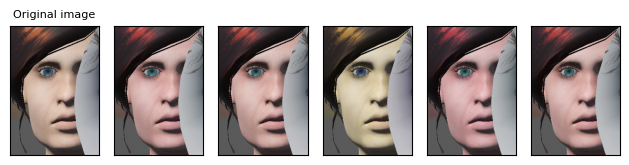

In [78]:
print('HUE')
num = 0.085
jitter = T.ColorJitter(hue=[-num,num])
jitted_imgs = [jitter(orig_img) for _ in range(5)]
plot(jitted_imgs)

All together


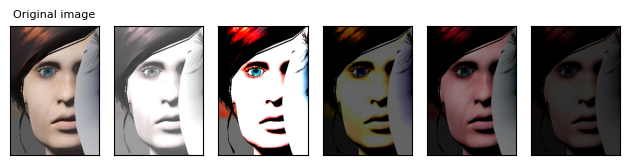

In [80]:
print('All together')
jitter = T.ColorJitter(brightness=[0.0,1.7],
                       contrast=[0.0,3.0],
                       saturation=[0.0,2.5],
                       hue=[-0.085,0.085])
jitted_imgs = [jitter(orig_img) for _ in range(5)]
plot(jitted_imgs)